### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import numpy.random as nr
import math
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import sklearn.model_selection as ms
from sklearn import cross_validation
from sklearn import svm, preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from  sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\aliri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\aliri\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\aliri\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\aliri\Anaconda3\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\aliri\Anaconda3\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\aliri\Anaconda3\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
df=pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

In [4]:
df.columns=['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6','Annotation']

In [5]:
X1=df[['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6']]
y1=df['Annotation']

In [7]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X1, y1, shuffle = True, test_size = 0.1)

In [8]:
X=sample_data
y=sample_target

In [9]:
X.shape

(14071, 77)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

## Voting Classifiers

#### Hard voting classifiers on Logistic Regression and K Neighbors

In [12]:
log_clf = LogisticRegression(C = 100)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(20)
knn_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9670267197271177
KNeighborsClassifier 0.9644684479818079
VotingClassifier 0.9673109721432632


C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Soft voting classifiers on SVC and Decision Tree

In [13]:
svm_clf = SVC(C = 1000,gamma = 0.01, probability = True)
svm_clf.fit(X_train, y_train)
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, y_train)

voting_clf2 = VotingClassifier(estimators=[('svc', svm_clf), ('dt',tree_clf )], voting='soft')
voting_clf2.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (svm_clf,tree_clf, voting_clf2):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


SVC 0.9656054576463899
DecisionTreeClassifier 0.957646389994315
VotingClassifier 0.9644684479818079


C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Bagging and Pasting Classifiers

#### Bagging classifier on Decision Tree

In [14]:
dt_clf = DecisionTreeClassifier(max_depth=2)
bag1_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag1_clf.fit(X_train, y_train)
y_pred = bag1_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.966173962478681


In [15]:
print('Train score: {:.2f}'.format(bag1_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag1_clf.score(X_test, y_test)))

Train score: 0.96
Test score: 0.97


In [16]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

probabilities = bag1_clf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2748                58
Actual negative        61               651

Accuracy        0.97
AUC             0.99
Macro precision 0.95
Macro recall    0.95
 
           Positive      Negative
Num case     2806           712
Precision    0.98          0.92
Recall       0.98          0.91
F1           0.98          0.92


#### Bagging classifier on K Neighbors

In [17]:
knn_clf = KNeighborsClassifier(20)
bag2_clf = BaggingClassifier(knn_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag2_clf.fit(X_train, y_train)
y_pred = bag2_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9297896532120523


In [18]:
print('Train score: {:.2f}'.format(bag2_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag2_clf.score(X_test, y_test)))

Train score: 0.92
Test score: 0.93


In [19]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = bag2_clf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2798                 8
Actual negative       239               473

Accuracy        0.93
AUC             0.99
Macro precision 0.95
Macro recall    0.83
 
           Positive      Negative
Num case     2806           712
Precision    0.92          0.98
Recall       1.00          0.66
F1           0.96          0.79


#### Pasting classifier on SVC

In [20]:
svm_clf = SVC(C = 1000,gamma = 0.01, probability = True)
bag3_clf = BaggingClassifier(svm_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag3_clf.fit(X_train, y_train)
y_pred = bag3_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9565093803297328


In [21]:
print('Train score: {:.2f}'.format(bag3_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag3_clf.score(X_test, y_test)))

Train score: 0.95
Test score: 0.96


In [22]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = bag3_clf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2784                22
Actual negative       131               581

Accuracy        0.96
AUC             0.99
Macro precision 0.96
Macro recall    0.90
 
           Positive      Negative
Num case     2806           712
Precision    0.96          0.96
Recall       0.99          0.82
F1           0.97          0.88


#### Pasting classifier on Logistic Regression

In [23]:
log_clf = LogisticRegression(C = 100)
bag4_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag4_clf.fit(X_train, y_train)
y_pred = bag4_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9567936327458784


In [24]:
print('Train score: {:.2f}'.format(bag4_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag4_clf.score(X_test, y_test)))

Train score: 0.95
Test score: 0.96


In [25]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = bag4_clf.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2775                31
Actual negative       121               591

Accuracy        0.96
AUC             0.99
Macro precision 0.95
Macro recall    0.91
 
           Positive      Negative
Num case     2806           712
Precision    0.96          0.95
Recall       0.99          0.83
F1           0.97          0.89


## Adaboost Boosting 

#### Adaboost on Decision Tree

##### Best parameter for learning rate

In [149]:
param_grid = {"learning_rate": [0.1, 1, 10]}

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, random_state=0)
ada_clf_grid = ms.GridSearchCV(estimator = ada_clf, param_grid = param_grid, 
                      cv = 5,
                      return_train_score = True)
ada_clf_grid.fit(X_train, y_train)
print(ada_clf_grid.best_estimator_.learning_rate)

1


In [26]:
ada_clf_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200, learning_rate=1,random_state=0)
ada_clf_dt.fit(X_train, y_train)
y_pred = ada_clf_dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9602046617396248


In [27]:
print('Train score: {:.2f}'.format(ada_clf_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf_dt.score(X_test, y_test)))

Train score: 1.00
Test score: 0.96


In [28]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = ada_clf_dt.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2739                67
Actual negative        73               639

Accuracy        0.96
AUC             0.99
Macro precision 0.94
Macro recall    0.94
 
           Positive      Negative
Num case     2806           712
Precision    0.97          0.91
Recall       0.98          0.90
F1           0.98          0.90


#### Adaboost on Logistic Regression

##### Best parameter for learning rate

In [152]:
param_grid = {"learning_rate": [0.1, 1, 10]}

ada_clf_lr = AdaBoostClassifier(LogisticRegression(C = 100), n_estimators=200, random_state=0)
ada_clf_grid_lr = ms.GridSearchCV(estimator = ada_clf, param_grid = param_grid, 
                      cv = 5,
                      return_train_score = True)
ada_clf_grid_lr.fit(X_train, y_train)
print(ada_clf_grid_lr.best_estimator_.learning_rate)

1


In [29]:
ada_clf_lr = AdaBoostClassifier(LogisticRegression(C = 100), n_estimators=200, learning_rate=1,random_state=0)
ada_clf_lr.fit(X_train, y_train)
y_pred = ada_clf_lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9607731665719159


In [154]:
print('Train score: {:.2f}'.format(ada_clf_lr.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf_lr.score(X_test, y_test)))

Train score: 0.99
Test score: 0.91


In [30]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = ada_clf_lr.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2776                30
Actual negative       108               604

Accuracy        0.96
AUC             0.99
Macro precision 0.96
Macro recall    0.92
 
           Positive      Negative
Num case     2806           712
Precision    0.96          0.95
Recall       0.99          0.85
F1           0.98          0.90


## Gradient Boosting

##### Best parameters for max_depth and learning rate.

In [155]:
param_grid  = {"max_depth": [3,5,4,6], "learning_rate":[0.1,0.5,1,1.5]}

gbrt = GradientBoostingClassifier(random_state=0)
grd_clf_grid = ms.GridSearchCV(estimator = gbrt, param_grid = param_grid, 
                      cv = 5,
                      return_train_score = True)
grd_clf_grid.fit(X_train, y_train)
print(grd_clf_grid.best_estimator_.learning_rate)
print(grd_clf_grid.best_estimator_.max_depth)

0.1
3


In [31]:
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=20, learning_rate=0.1, random_state=0)
gbrt.fit(X, y)
y_pred = gbrt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7976122797043775


In [32]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.798


In [33]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = gbrt.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2806                 0
Actual negative       712                 0

Accuracy        0.80
AUC             0.75
Macro precision 0.40
Macro recall    0.50
 
           Positive      Negative
Num case     2806           712
Precision    0.80          0.00
Recall       1.00          0.00
F1           0.89          0.00


C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## PCA

In [34]:
pca_mod = PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[4.20808102e-01 1.47728369e-01 9.24704847e-02 8.62818966e-02
 7.95546139e-02 6.33683007e-02 5.68724855e-02 3.75353488e-02
 1.82926473e-03 1.62454294e-03 1.46797213e-03 1.16923788e-03
 9.21101489e-04 8.73080112e-04 8.50883039e-04 6.70549475e-04
 6.51245218e-04 5.23935565e-04 4.79139319e-04 4.58880058e-04
 4.41938094e-04 4.39738800e-04 4.07025992e-04 3.63265938e-04
 3.19184667e-04 2.95739942e-04 2.71985642e-04 2.13818511e-04
 1.85559884e-04 1.60199726e-04 1.42681289e-04 9.53887918e-05
 6.16785530e-05 5.51660213e-05 4.94837846e-05 4.22156708e-05
 3.78676653e-05 3.49631894e-05 3.18755740e-05 2.98158916e-05
 2.52816664e-05 2.33289816e-05 1.97092894e-05 1.77710585e-05
 1.49125437e-05 1.21961343e-05 9.00557788e-06 8.13821950e-06
 6.20278673e-06 6.02904645e-06 5.58809463e-06 3.78469075e-06
 3.48364507e-06 3.11316682e-06 3.02556057e-06 2.70778665e-06
 2.64357785e-06 2.25212858e-06 1.87976128e-06 1.85533502e-06
 1.69183570e-06 1.52696714e-06 1.20699709e-06 1.02074114e-06
 9.05833214e-07 7.315759

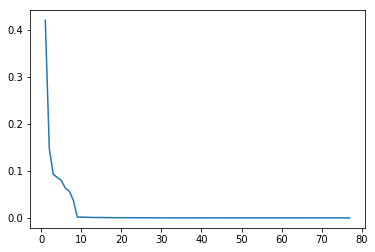

In [36]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)
plot_explained(pca_comps)

###### Number of features after dimension reduction

In [38]:
pca_mod_10 = PCA(n_components = 10)
pca_mod_10.fit(X_train)
Comps = pca_mod_10.transform(X_train)
Comps.shape

(10553, 10)

In [39]:
X_train=Comps

In [40]:
pca_mod_10.fit(X_test)
Comps_test = pca_mod_10.transform(X_test)

In [41]:
X_test=Comps_test

### Running models after applying PCA

#### K Neighbors

In [42]:
knn = KNeighborsClassifier(20)
knn.fit(X_train, y_train)
y_knn_predict = knn.predict(X_test)
y_knn_train_predict = knn.predict(X_train)

report_table=0
report_table1 = [['knn', 'k = 20', knn.score(X_train, y_train), knn.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]

In [48]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = knn.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2605               201
Actual negative       661                51

Accuracy        0.75
AUC             0.60
Macro precision 0.50
Macro recall    0.50
 
           Positive      Negative
Num case     2806           712
Precision    0.80          0.20
Recall       0.93          0.07
F1           0.86          0.11


#### Logistic Regression

In [43]:
logistic_mod = linear_model.LogisticRegression(C = 100.0) 
logistic_mod.fit(X_train, y_train)
y_clf_predict = logistic_mod.predict(X_test)
y_clf_train_predict = logistic_mod.predict(X_train)

report_table2 = [['log reg', 'C = 100', logistic_mod.score(X_train, y_train), logistic_mod.score(X_test, y_test), roc_auc_score(y_clf_train_predict, y_train), roc_auc_score(y_clf_predict, y_test) ]]

In [49]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2437               369
Actual negative       358               354

Accuracy        0.79
AUC             0.83
Macro precision 0.68
Macro recall    0.68
 
           Positive      Negative
Num case     2806           712
Precision    0.87          0.49
Recall       0.87          0.50
F1           0.87          0.49


#### Linear SVC

In [44]:
svc_lin = LinearSVC(C=10)
svc_lin.fit(X_train, y_train)
y_svc_lin_predict_train = svc_lin.predict(X_train)
y_svc_lin_predict = svc_lin.predict(X_test)

report_table3 =[['LinearSVC', 'C = 10', svc_lin.score(X_train, y_train), svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), roc_auc_score(y_svc_lin_predict, y_test)]]

#### Kernel SVC

In [45]:
kernelized_svc = SVC(kernel='rbf', gamma=0.01, C=1000)
kernelized_svc.fit(X_train, y_train)
y_svc_ker_predict_train = kernelized_svc.predict(X_train)
y_svc_ker_predict = kernelized_svc.predict(X_test)

report_table4 = [['KernelSVC', 'C = 1000,gamma = 0.01', kernelized_svc.score(X_train, y_train), kernelized_svc.score(X_test, y_test), roc_auc_score(y_svc_ker_predict_train, y_train), roc_auc_score(y_svc_ker_predict, y_test)]]

#### Decision Tree

In [46]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(X_train, y_train)
y_svc_tree_predict_train = dtree.predict(X_train)
y_svc_tree_predict = dtree.predict(X_test)

report_table5 =   [['DecisionTree', 'max_depth = 2', dtree.score(X_train, y_train), dtree.score(X_test, y_test), roc_auc_score(y_svc_tree_predict_train, y_train), roc_auc_score(y_svc_tree_predict, y_test)]]

In [52]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = dtree.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1332              1474
Actual negative        57               655

Accuracy        0.56
AUC             0.72
Macro precision 0.63
Macro recall    0.70
 
           Positive      Negative
Num case     2806           712
Precision    0.96          0.31
Recall       0.47          0.92
F1           0.64          0.46


#### Table of models after PCA

In [53]:
print("Table of Scores after applying PCA\n")
report_table_all = report_table1+report_table2+report_table3+report_table4+report_table5
report = pd.DataFrame(report_table_all,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report

Table of Scores after applying PCA



,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
0,knn,k = 20,0.963044,0.754974,0.948207,0.499996
1,log reg,C = 100,0.960769,0.793348,0.946862,0.680770
2,LinearSVC,C = 10,0.960580,0.753837,0.947512,0.622559
3,KernelSVC,"C = 1000,gamma = 0.01",0.961433,0.766629,0.945222,0.653619
4,DecisionTree,max_depth = 2,0.936227,0.564810,0.899995,0.633310


In [ ]:
#  Table of Scores before applying PCA
  
#  Model name       Model param    Train acc    Test acc    Train auc     Test auc   
#     knn              k=20          0.9909      0.9537       0.9453       0.9026
#   log reg            C=100         0.9934      0.9767       0.9506       0.9086
#  LinearSVC           C=10          0.9934      0.9755       0.9662       0.9148
#  KernelSVC    C=1000,gamma=0.01    0.9684      0.9394       0.9551       0.9126
#  DecisinTree      max_depth=2      0.9602      0.9394       0.9306       0.9002

For almost all the models, train and test score decreased after applying PCA on the data set. For Decision tree the decrease in test auc score is dramatic. It seems that we don't get better results after applying PCA but the runnning time decreased due to having less number of features.

## Deep Learning

In [180]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [181]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(13, input_dim=77, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [183]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 3)
grid_search_result = grid_search.fit(X, y)

In [184]:
grid_search.best_params_

{'batch_size': 40, 'epochs': 100}

In [186]:
model = Sequential()
model.add(Dense(12, input_dim=77, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [187]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [188]:
model.fit(X_train, y_train, epochs=100, batch_size=40)

Epoch 1/100
159/159 [==============================] - 14s 91ms/step - loss: 0.6664 - acc: 0.7484
Epoch 2/100
159/159 [==============================] - 0s 395us/step - loss: 0.6329 - acc: 0.7799
Epoch 3/100
159/159 [==============================] - 0s 386us/step - loss: 0.6086 - acc: 0.7799
Epoch 4/100
159/159 [==============================] - 0s 397us/step - loss: 0.5846 - acc: 0.7799
Epoch 5/100
159/159 [==============================] - 0s 303us/step - loss: 0.5623 - acc: 0.7799
Epoch 6/100
159/159 [==============================] - 0s 467us/step - loss: 0.5396 - acc: 0.7799
Epoch 7/100
159/159 [==============================] - 0s 474us/step - loss: 0.5174 - acc: 0.7799
Epoch 8/100
159/159 [==============================] - 0s 514us/step - loss: 0.4954 - acc: 0.7799
Epoch 9/100
159/159 [==============================] - 0s 394us/step - loss: 0.4747 - acc: 0.7799
Epoch 10/100
159/159 [==============================] - 0s 350us/step - loss: 0.4556 - acc: 0.7799
Epoch 11/100
159/15

159/159 [==============================] - 0s 375us/step - loss: 0.2139 - acc: 0.9623
Epoch 84/100
159/159 [==============================] - 0s 382us/step - loss: 0.2128 - acc: 0.9623
Epoch 85/100
159/159 [==============================] - 0s 431us/step - loss: 0.2126 - acc: 0.9623
Epoch 86/100
159/159 [==============================] - 0s 447us/step - loss: 0.2122 - acc: 0.9623
Epoch 87/100
159/159 [==============================] - 0s 326us/step - loss: 0.2118 - acc: 0.9623
Epoch 88/100
159/159 [==============================] - 0s 329us/step - loss: 0.2114 - acc: 0.9623
Epoch 89/100
159/159 [==============================] - 0s 344us/step - loss: 0.2108 - acc: 0.9623
Epoch 90/100
159/159 [==============================] - 0s 385us/step - loss: 0.2106 - acc: 0.9623
Epoch 91/100
159/159 [==============================] - 0s 420us/step - loss: 0.2104 - acc: 0.9623
Epoch 92/100
159/159 [==============================] - 0s 346us/step - loss: 0.2100 - acc: 0.9623
Epoch 93/100
159/159 [=

In [189]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

53/53 [==============================] - 7s 124ms/step

acc: 94.34%
